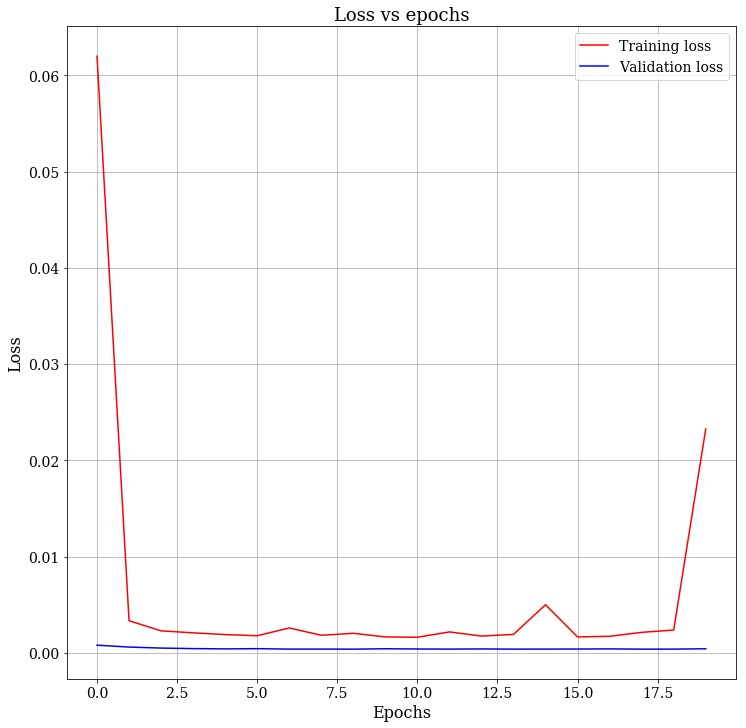

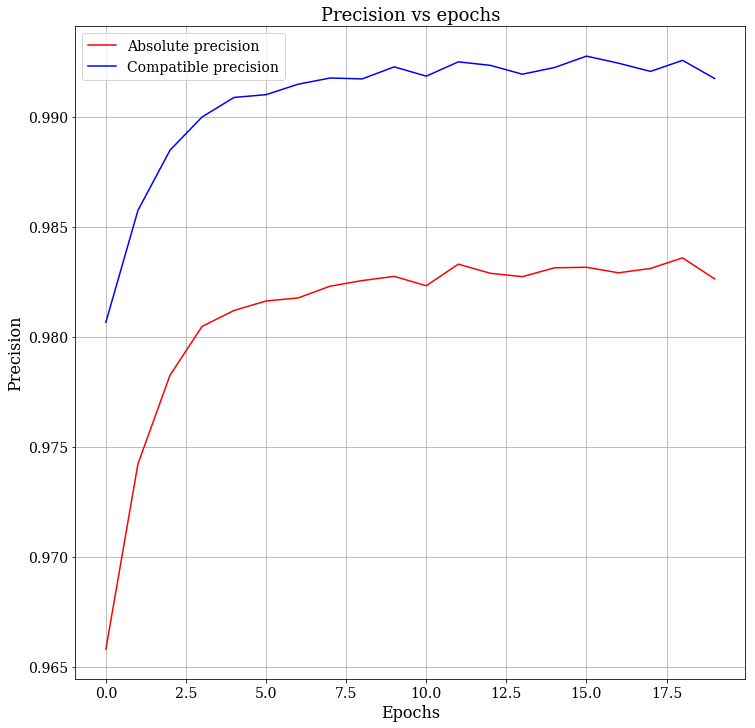

In [2]:
import numpy as np
import json
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

font = {'family': 'serif', 'size': 14}

plt.rc('font', **font)

size_title = 18
size_label = 16
n_pred = 2

'''
Best parameters
{'activation_output': 'sigmoid', 'activation_recurrent': 'elu', 'batch_size': 362.0, 'dropout': 0.11455003322070273, 'embedding_size': 376.0, 'learning_rate': 0.0029593661646978467, 'recurrent_dropout': 0.3208157833086489, 'spatial_dropout': 0.2215425112122827, 'units': 479.0}

Training loss
[0.06200234,0.00335496,0.00230228, 0.00209509, 0.00191665, 0.00179346
 , 0.00260126, 0.00184284, 0.00204932, 0.00167216, 0.00163605, 0.0021902
 , 0.00175958, 0.00193521, 0.00501555, 0.00166902, 0.00173608, 0.00214613
 , 0.00238561, 0.02327239]

Validation loss
[0.00081401, 0.00061691, 0.00051134, 0.00045839, 0.00042793, 0.00045108
 , 0.0004055, 0.00040999, 0.00040097, 0.00044206, 0.00041766, 0.00040594
 , 0.00042229, 0.00040363, 0.00040828, 0.00041287, 0.00042837, 0.00040135
 , 0.00040495, 0.00044087]

Absolute precision
[0.9657970182621041, 0.9742199717064003, 0.9782553169589325, 0.9804807281135005, 0.9812066949241369, 0.9816390841212604, 0.9817767293153191, 0.9823131025708652, 0.9825673483133496, 0.9827585672873834, 0.9823329698671839, 0.9833139920461588, 0.9828992582331565, 0.9827439861548404, 0.9831480702164607, 0.9831731630679614, 0.9829200753059485, 0.9831191072270549, 0.9835991826432054, 0.9826442405453414]

Compatible precision
[0.980673565316657, 0.9857572517916002, 0.9884964371741456, 0.9900083794786728, 0.9908997193664825, 0.9910258246274025, 0.9915012312530409, 0.9917839891636419, 0.9917432172949183, 0.9922913657246292, 0.9918685121385861, 0.9925187062430803, 0.9923597846072426, 0.9919567962343956, 0.9922598798860884, 0.9927794041105942, 0.9924580829931404, 0.9920842082093836, 0.992587711304401, 0.991762194056694]

Predicted tools usage scores
[130.80975723690244, 132.54153813583176, 134.46908041994578, 135.40878167311564, 135.61016405718914, 134.830177405051, 134.01611671394008, 134.9524043200689, 134.70416647551653, 134.7785197328254, 134.97644648036436, 135.65877588514326, 134.6758938676385, 134.80336285510944, 134.6520608531414, 134.96664985388773, 134.21170197679697, 134.78470070218086, 134.75303863152237, 134.71251356652496]


'''

#Training loss
tr_loss = [0.06200234,0.00335496,0.00230228, 0.00209509, 0.00191665, 0.00179346
 , 0.00260126, 0.00184284, 0.00204932, 0.00167216, 0.00163605, 0.0021902
 , 0.00175958, 0.00193521, 0.00501555, 0.00166902, 0.00173608, 0.00214613
 , 0.00238561, 0.02327239]

#Test loss
te_loss = [0.00081401, 0.00061691, 0.00051134, 0.00045839, 0.00042793, 0.00045108
 , 0.0004055, 0.00040999, 0.00040097, 0.00044206, 0.00041766, 0.00040594
 , 0.00042229, 0.00040363, 0.00040828, 0.00041287, 0.00042837, 0.00040135
 , 0.00040495, 0.00044087]

#Test absolute precision
test_abs_precision = [0.9657970182621041, 0.9742199717064003, 0.9782553169589325, 0.9804807281135005, 0.9812066949241369, 0.9816390841212604, 0.9817767293153191, 0.9823131025708652, 0.9825673483133496, 0.9827585672873834, 0.9823329698671839, 0.9833139920461588, 0.9828992582331565, 0.9827439861548404, 0.9831480702164607, 0.9831731630679614, 0.9829200753059485, 0.9831191072270549, 0.9835991826432054, 0.9826442405453414]


#Test compatible precision
test_comp_precision = [0.980673565316657, 0.9857572517916002, 0.9884964371741456, 0.9900083794786728, 0.9908997193664825, 0.9910258246274025, 0.9915012312530409, 0.9917839891636419, 0.9917432172949183, 0.9922913657246292, 0.9918685121385861, 0.9925187062430803, 0.9923597846072426, 0.9919567962343956, 0.9922598798860884, 0.9927794041105942, 0.9924580829931404, 0.9920842082093836, 0.992587711304401, 0.991762194056694]


#Mean usage scores
mean_usage = [130.80975723690244, 132.54153813583176, 134.46908041994578, 135.40878167311564, 135.61016405718914, 134.830177405051, 134.01611671394008, 134.9524043200689, 134.70416647551653, 134.7785197328254, 134.97644648036436, 135.65877588514326, 134.6758938676385, 134.80336285510944, 134.6520608531414, 134.96664985388773, 134.21170197679697, 134.78470070218086, 134.75303863152237, 134.71251356652496]


def plot_hist(x_val1, x_val2, title, xlabel, ylabel, leg):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.plot(x_pos, x_val2, 'b')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.legend(leg)
    plt.grid(True)
    plt.show()

plot_hist(tr_loss, te_loss, "Loss vs epochs", "Epochs", "Loss", ['Training loss', 'Validation loss'])
plot_hist(test_abs_precision, test_comp_precision, "Precision vs epochs", "Epochs", "Precision", 
          ['Absolute precision', 'Compatible precision'])

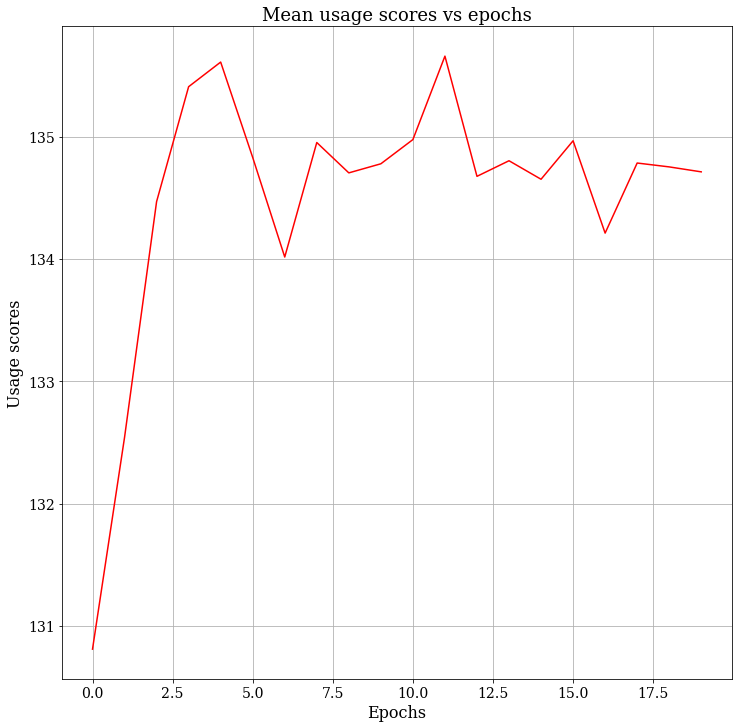

In [3]:
import json 

def plot_hist_one(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.plot(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()
    
plot_hist_one(mean_usage, "Mean usage scores vs epochs", "Epochs", "Usage scores")

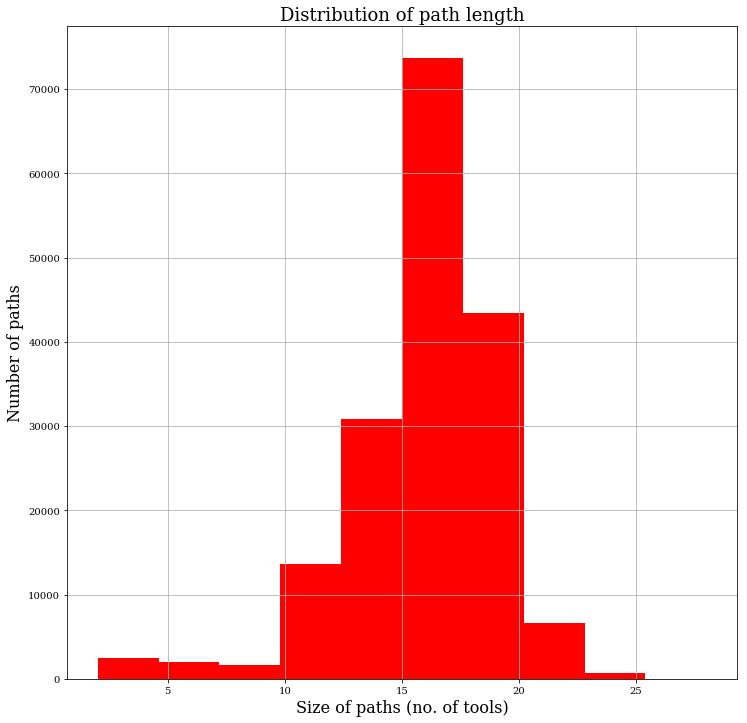

In [12]:
import json 

def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

base_path = "data/evaluate_sigmoid_512_test/"

path_dd = base_path + "paths.txt"

data_dist = read_file(path_dd)

data_dist = list(set(data_dist))

path_length = list()

for item in data_dist:
    path_length.append(len(item.split(",")))

def plot_hist_dist(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    #x_pos = np.arange(len(x_val1))
    plt.hist(x_val1, color='r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()
 
plot_hist_dist(path_length, "Distribution of path length", "Size of paths (no. of tools)", "Number of paths")



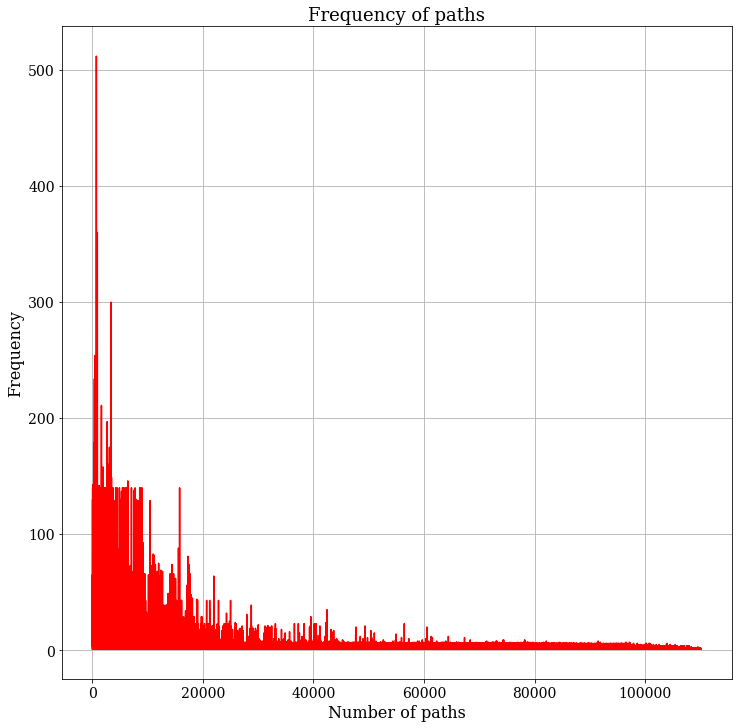

In [26]:
path_freq = read_file("data/for_plots/frequency_paths.txt")

path_freq_values = list()
for item in path_freq:
    freq = path_freq[item]
    path_freq_values.append(freq)
plot_hist_one(path_freq_values, "Frequency of paths", "Number of paths", "Frequency")

AttributeError: 'NoneType' object has no attribute 'update'

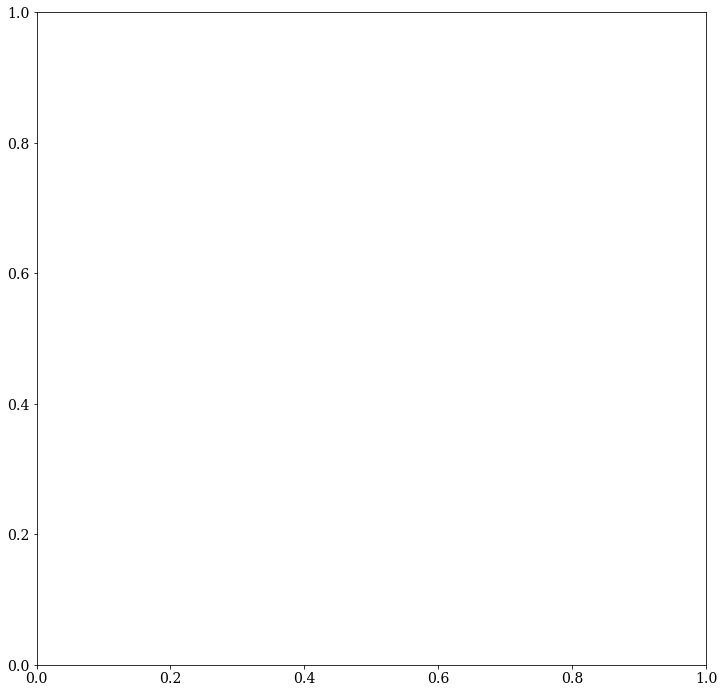

In [32]:


def read_file(file_path):
    with open(file_path, 'r') as data_file:
        data = json.loads(data_file.read())
    return data

def plot_hist_two(x_val1, title, xlabel, ylabel):

    plt.figure(figsize=(12, 12))
    x_pos = np.arange(len(x_val1))
    plt.hist(x_pos, x_val1, 'r')
    plt.xlabel(xlabel, size=size_label)
    plt.ylabel(ylabel, size=size_label)
    plt.title(title, size=size_title)
    plt.grid(True)
    plt.show()

path_tr_data = read_file("data/for_plots/train_paths_dict.txt")
tr_paths_length = dict()
tr_labels_length = dict()
for item in path_tr_data:
    path = item
    labels = path_tr_data[item]
    
    path_len = len(path.split(","))
    labels_len = len(labels.split(","))
    
    if path_len in tr_paths_length:
        tr_paths_length[path_len] += 1
    else:
        tr_paths_length[path_len] = 1
        
    if labels_len in tr_labels_length:
        tr_labels_length[labels_len] += 1
    else:
        tr_labels_length[labels_len] = 1
        
plot_hist_two(list(tr_paths_length.values()), "Size of paths", "Size (number of tools)", "Number of paths")
plot_hist_two(list(tr_labels_length.values()), "Size of labels", "Size (number of tools)", "Number of paths")
    

In [30]:
tr_labels_length

{2: 58452,
 1: 82872,
 3: 15155,
 4: 6041,
 5: 2051,
 7: 175,
 6: 275,
 8: 86,
 9: 32,
 11: 1,
 10: 5,
 19: 1,
 14: 2,
 13: 1,
 12: 1}